In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
train_data=pd.read_csv("Week7_train.csv")

In [12]:
test_data=pd.read_csv("Week7_test.csv")

In [14]:
train_data.shape

(42000, 785)

In [16]:
test_data.shape

(28000, 784)

In [18]:
train_sample=train_data.sample(frac=0.1,random_state=42)

In [20]:
print(train_sample)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
5457       8       0       0       0       0       0       0       0       0   
38509      1       0       0       0       0       0       0       0       0   
25536      9       0       0       0       0       0       0       0       0   
31803      9       0       0       0       0       0       0       0       0   
39863      8       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
16041      4       0       0       0       0       0       0       0       0   
4867       2       0       0       0       0       0       0       0       0   
28123      7       0       0       0       0       0       0       0       0   
3780       7       0       0       0       0       0       0       0       0   
7155       5       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [22]:
train_sample.shape

(4200, 785)

In [30]:
train_sample.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30639,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12986,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41067,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30743,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6839,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
unique=train_sample['label'].nunique()
print(unique)

10


In [40]:
count=train_sample['label'].value_counts()
print(count)

label
3    506
1    471
7    438
2    420
9    416
0    408
8    403
6    402
4    397
5    339
Name: count, dtype: int64


In [42]:
x=train_sample.drop('label',axis=1)
y=train_sample['label']

In [48]:
train_sample.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


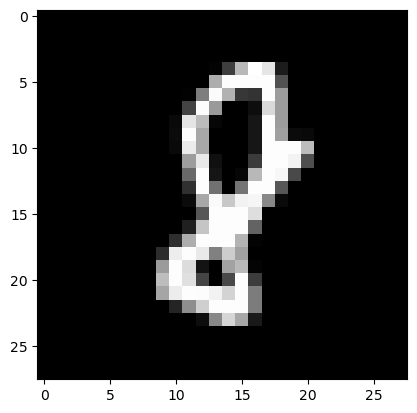

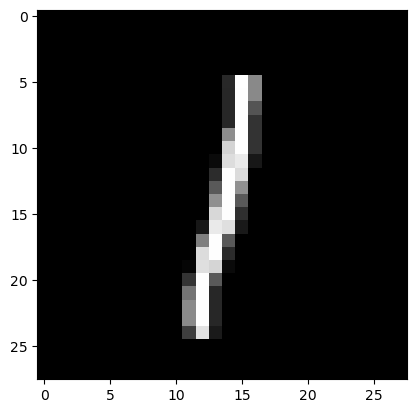

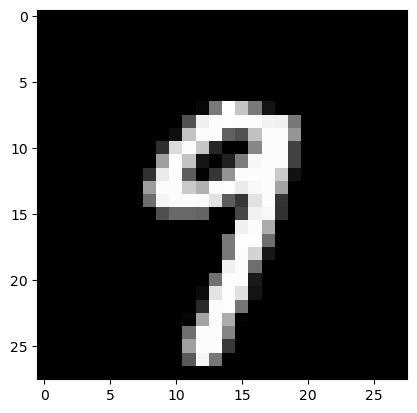

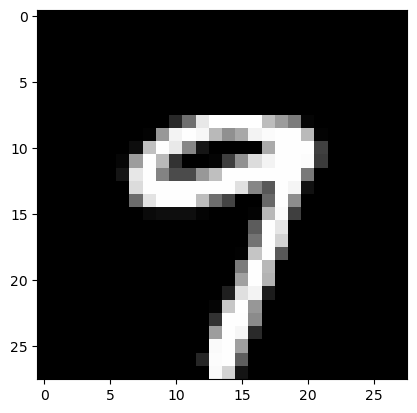

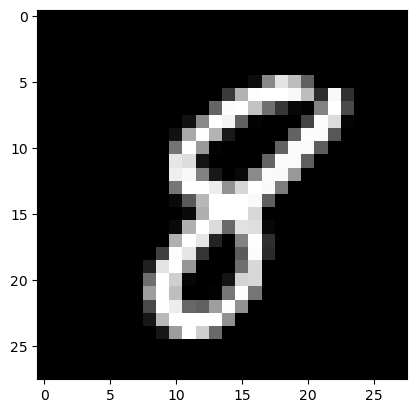

In [46]:
for i in range(5):
    image=x.iloc[i].values.reshape(28,28)
    plt.imshow(image,cmap='grey')
    plt.show()

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(x,y,random_state=42,test_size=0.25)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn=KNeighborsClassifier(n_neighbors=3,metric="euclidean")
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [54]:
y_pred=knn.predict(x_valid)

In [56]:
y_pred

array([9, 3, 6, ..., 1, 7, 9])

In [60]:
print(classification_report(y_pred,y_valid))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       101
           1       1.00      0.85      0.92       139
           2       0.92      0.97      0.94        86
           3       0.90      0.95      0.93       125
           4       0.92      0.93      0.92        94
           5       0.95      0.93      0.94        87
           6       0.99      0.94      0.97       104
           7       0.89      0.92      0.91       114
           8       0.82      0.97      0.89        90
           9       0.89      0.85      0.87       110

    accuracy                           0.92      1050
   macro avg       0.93      0.93      0.93      1050
weighted avg       0.93      0.92      0.92      1050



In [82]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_pred,y_valid))

[[ 99   0   0   0   0   0   0   0   0   2]
 [  0 118   4   0   0   1   1   7   6   2]
 [  0   0  83   1   0   0   0   1   1   0]
 [  1   0   0 119   0   1   0   0   3   1]
 [  0   0   0   0  87   1   0   0   1   5]
 [  0   0   0   5   0  81   0   0   1   0]
 [  1   0   0   0   3   1  98   0   1   0]
 [  0   0   3   2   1   0   0 105   1   2]
 [  0   0   0   3   0   0   0   0  87   0]
 [  0   0   0   2   4   0   0   5   5  94]]


In [66]:
knn=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [68]:
y_p=knn.predict(x_valid)
y_p

array([9, 3, 6, ..., 1, 7, 9])

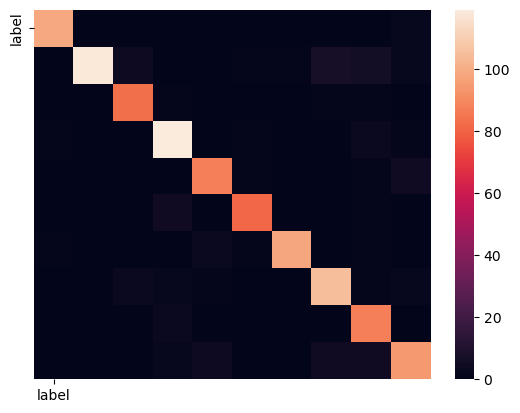

In [74]:
import seaborn as sns
cm=confusion_matrix(y_p,y_valid)
sns.heatmap(cm,xticklabels=['label'],yticklabels=['label'])
plt.show()

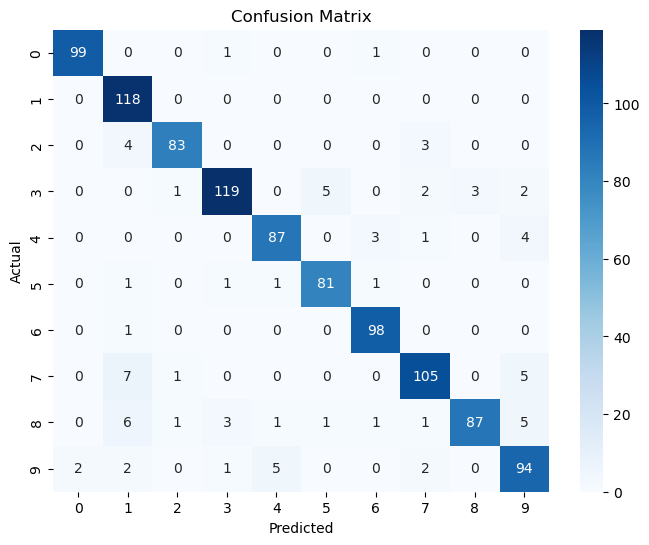

In [76]:
cm = confusion_matrix(y_valid, y_p)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [80]:
print(classification_report(y_p,y_valid))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       101
           1       1.00      0.85      0.92       139
           2       0.92      0.97      0.94        86
           3       0.90      0.95      0.93       125
           4       0.92      0.93      0.92        94
           5       0.95      0.93      0.94        87
           6       0.99      0.94      0.97       104
           7       0.89      0.92      0.91       114
           8       0.82      0.97      0.89        90
           9       0.89      0.85      0.87       110

    accuracy                           0.92      1050
   macro avg       0.93      0.93      0.93      1050
weighted avg       0.93      0.92      0.92      1050



In [84]:
print(accuracy_score(y_p,y_valid))

0.9247619047619048


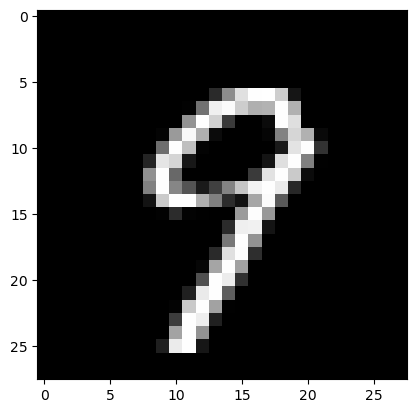

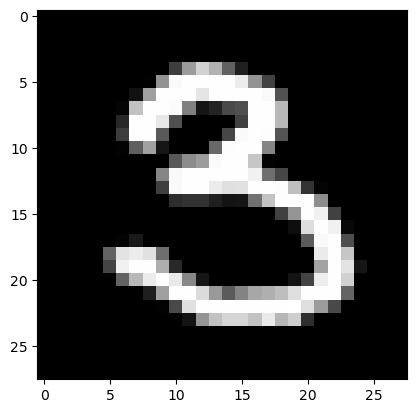

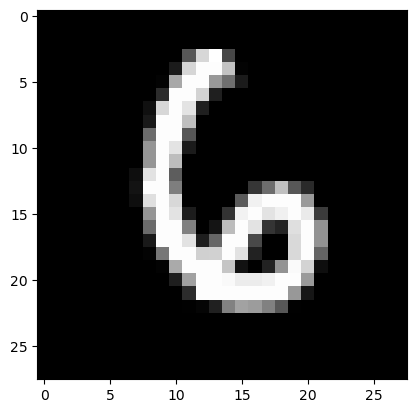

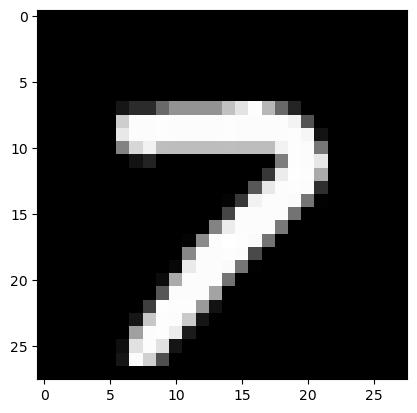

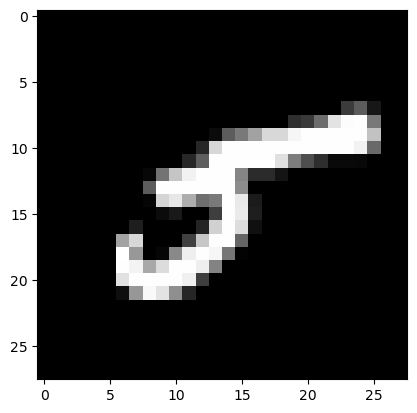

In [98]:
for i in range(5):
    image=x_valid.iloc[i].values.reshape(28,28)
    plt.imshow(image,cmap='grey')
    plt.show()

In [94]:
y_valid.head()

14150    9
30139    3
5501     6
32460    7
29413    5
Name: label, dtype: int64